In [ ]:
# STEP 1: Install required packages
!pip install openpyxl pingouin factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.5 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=c2ad4f45a9ef05a69ab79dddc326fdf185bbdb2c45c3427e65667580b953d484
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [ ]:
# STEP 2: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pingouin import cronbach_alpha
from factor_analyzer import FactorAnalyzer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Replace with the correct filename from upload
df = pd.read_excel("/content/Marketing_Customer_Acquisition_Dataset.xlsx")


In [ ]:
# STEP 4: Descriptive Summary
print(df.describe(include='all'))


                   Gender  Age          Education Employment  \
count                 400  400                400        400   
unique                  3    5                  5          5   
top     Prefer not to say  56+  Bachelor’s degree    Student   
freq                  139   96                 89         88   
mean                  NaN  NaN                NaN        NaN   
std                   NaN  NaN                NaN        NaN   
min                   NaN  NaN                NaN        NaN   
25%                   NaN  NaN                NaN        NaN   
50%                   NaN  NaN                NaN        NaN   
75%                   NaN  NaN                NaN        NaN   
max                   NaN  NaN                NaN        NaN   

                  Income        smm1        smm2        smm3        smm4  \
count                400  400.000000  400.000000  400.000000  400.000000   
unique                 4         NaN         NaN         NaN         NaN   
top

/tmp/ipython-input-5-2518646041.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=var, order=order, palette="Set2", stat="percent")


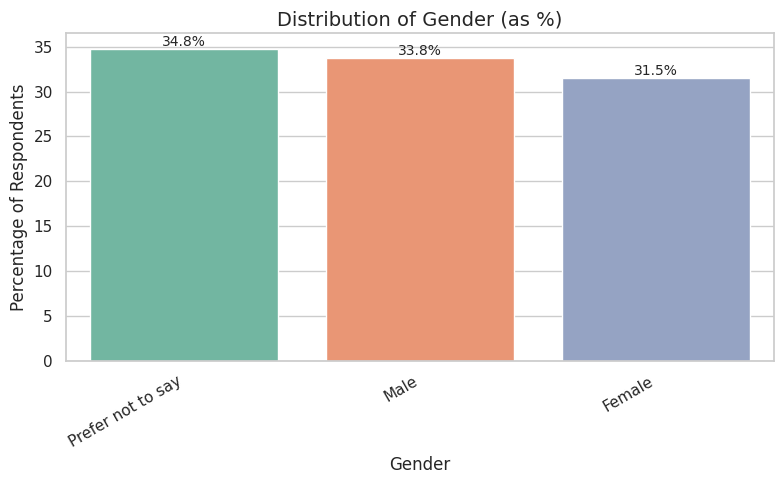

/tmp/ipython-input-5-2518646041.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=var, order=order, palette="Set2", stat="percent")


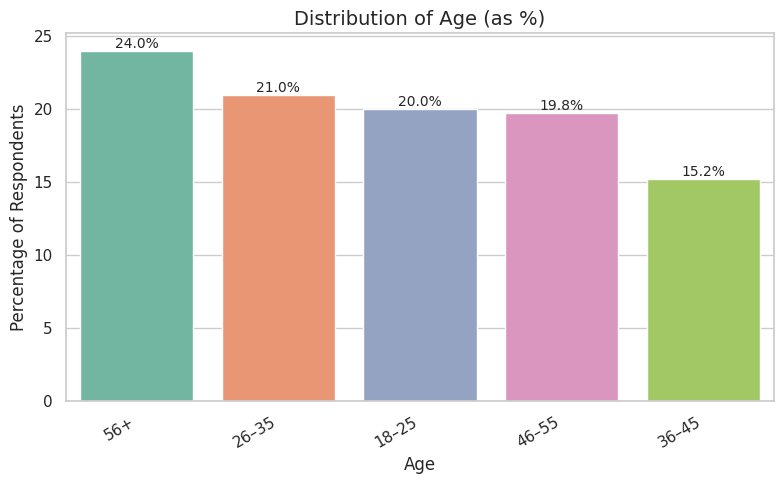

/tmp/ipython-input-5-2518646041.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=var, order=order, palette="Set2", stat="percent")


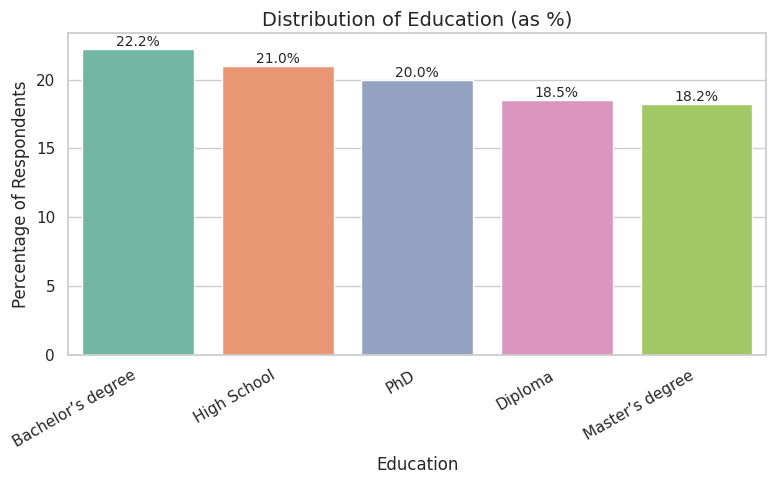

/tmp/ipython-input-5-2518646041.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=var, order=order, palette="Set2", stat="percent")


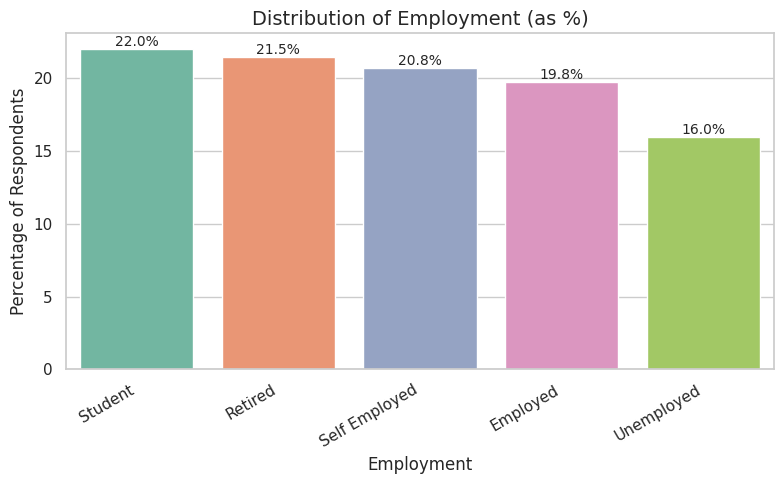

/tmp/ipython-input-5-2518646041.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=var, order=order, palette="Set2", stat="percent")


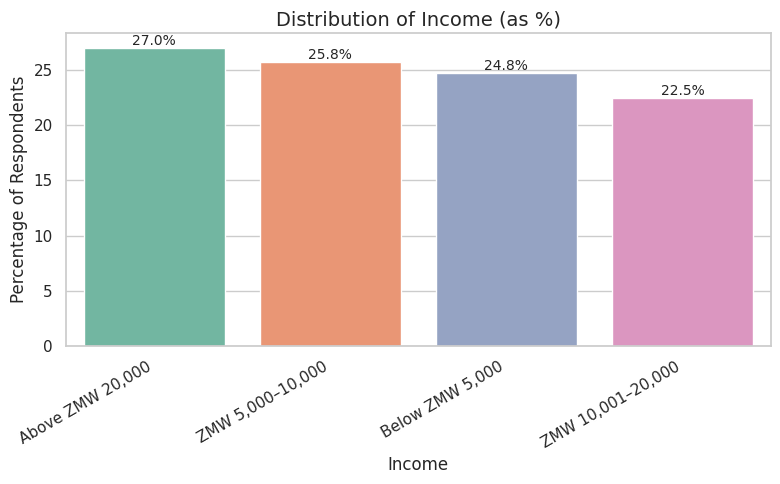

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Define demographic variables
demographics = ['Gender', 'Age', 'Education', 'Employment', 'Income']

# @title Plot bar charts for each demographic variable with percentages
for var in demographics:
    plt.figure(figsize=(8, 5))
    order = df[var].value_counts(normalize=True).index  # preserve natural order
    ax = sns.countplot(data=df, x=var, order=order, palette="Set2", stat="percent")

    # Add percentage labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=10)

    plt.title(f"Distribution of {var} (as %)", fontsize=14)
    plt.xlabel(var)
    plt.ylabel("Percentage of Respondents")
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()


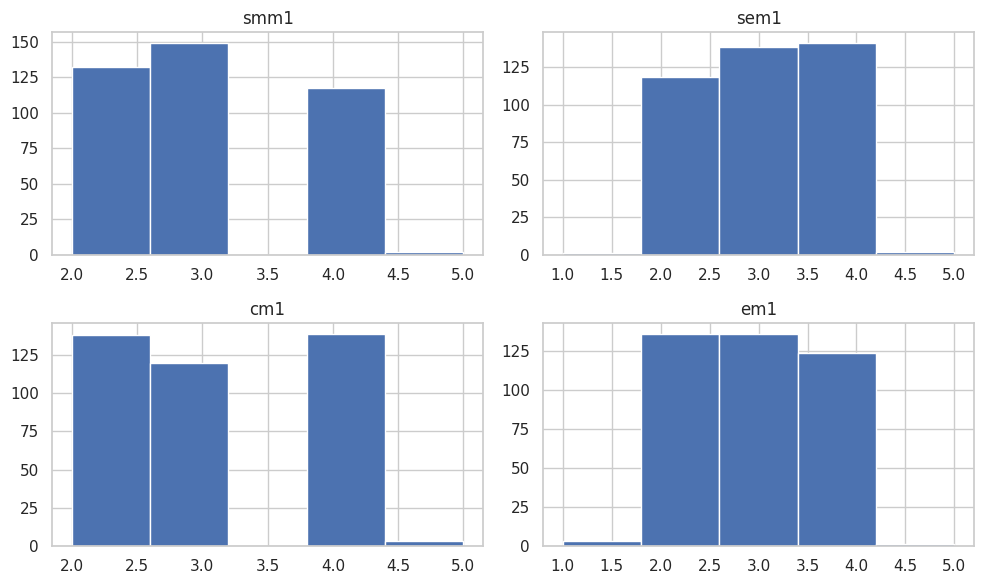

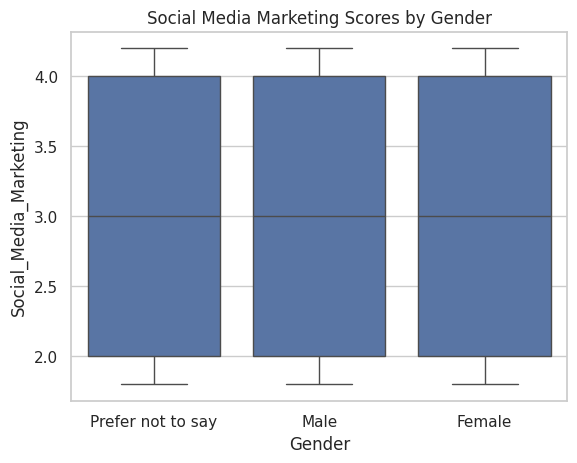

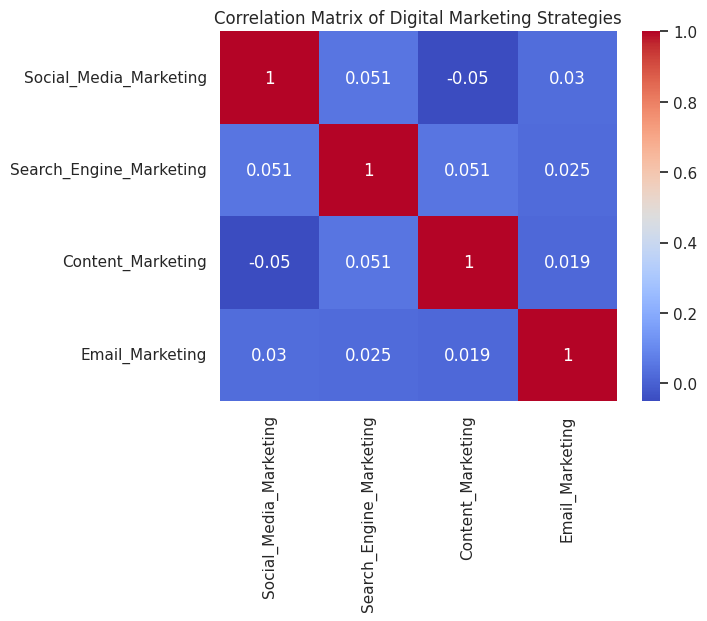

In [ ]:
# @title STEP 5: Exploratory Data Analysis (EDA)
# First calculate the composite scores
df['Social_Media_Marketing'] = df[[f'smm{i}' for i in range(1,6)]].mean(axis=1)
df['Search_Engine_Marketing'] = df[[f'sem{i}' for i in range(1,6)]].mean(axis=1)
df['Content_Marketing'] = df[[f'cm{i}' for i in range(1,6)]].mean(axis=1)
df['Email_Marketing'] = df[[f'em{i}' for i in range(1,6)]].mean(axis=1)

# Histograms
df[['smm1', 'sem1', 'cm1', 'em1']].hist(bins=5, figsize=(10, 6))
plt.tight_layout()
plt.show()

# Boxplot by Gender
sns.boxplot(x='Gender', y='Social_Media_Marketing', data=df)
plt.title('Social Media Marketing Scores by Gender')
plt.show()

# Heatmap of correlations
composites = ['Social_Media_Marketing', 'Search_Engine_Marketing', 'Content_Marketing', 'Email_Marketing']
sns.heatmap(df[composites].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Digital Marketing Strategies")
plt.show()

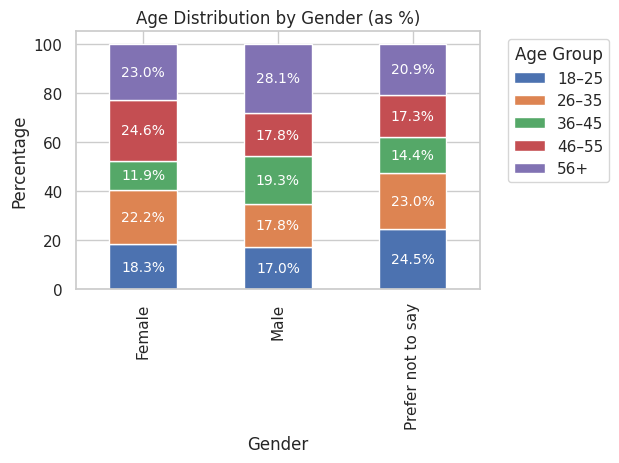

In [ ]:
# @title STEP 6: Cross-tabulations with percentages

# Create a crosstab of Gender vs Age
crosstab = pd.crosstab(df['Gender'], df['Age'])

# Convert counts to row-wise percentages
crosstab_percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Plot stacked bar chart with percentages
ax = crosstab_percent.plot(kind='bar', stacked=True)
plt.title("Age Distribution by Gender (as %)")
plt.ylabel("Percentage")
plt.xlabel("Gender")
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white")

plt.show()


In [ ]:
# First verify the column exists or create it
print("Existing columns:", df.columns.tolist())


Existing columns: ['Gender', 'Age', 'Education', 'Employment', 'Income', 'smm1', 'smm2', 'smm3', 'smm4', 'smm5', 'sem1', 'sem2', 'sem3', 'sem4', 'sem5', 'cm1', 'cm2', 'cm3', 'cm4', 'cm5', 'em1', 'em2', 'em3', 'em4', 'em5', 'Opened_Account', 'Social_Media_Marketing', 'Search_Engine_Marketing', 'Content_Marketing', 'Email_Marketing', 'SMM_Level', 'SEM_Level', 'CM_Level', 'EM_Level', 'Gender_Code', 'PEOU', 'SMM_c', 'PEOU_c', 'SMMxPEOU']


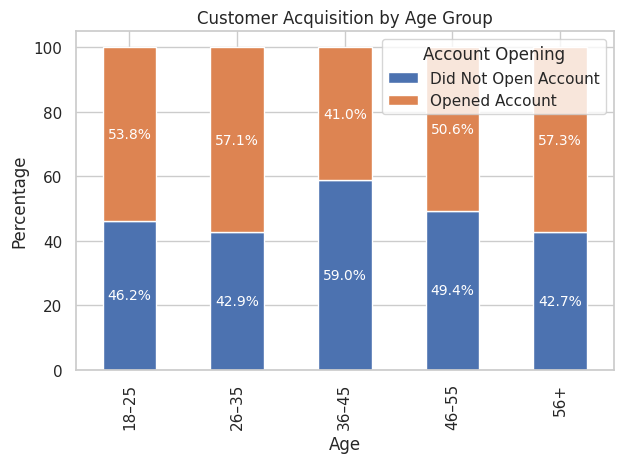

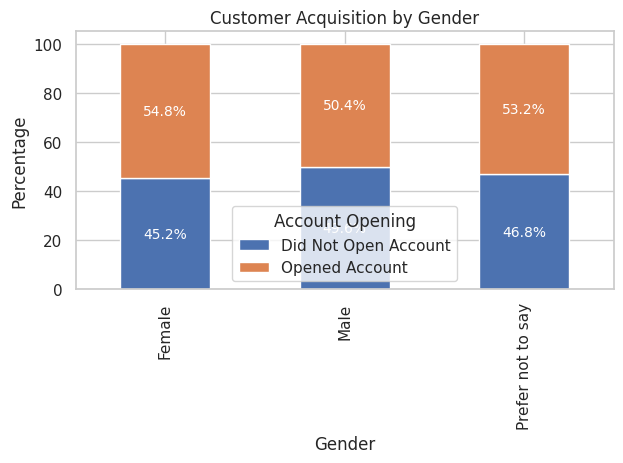

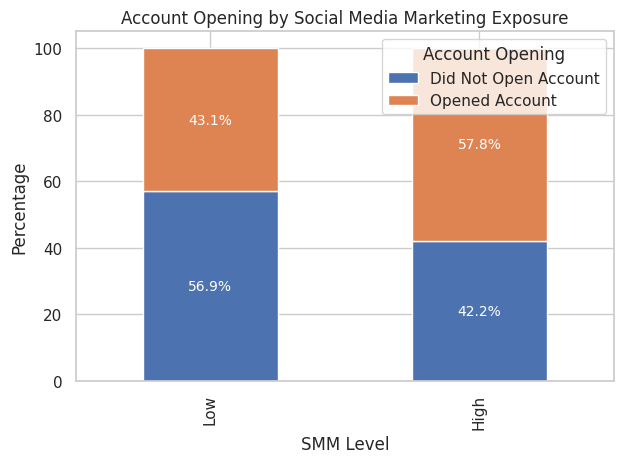

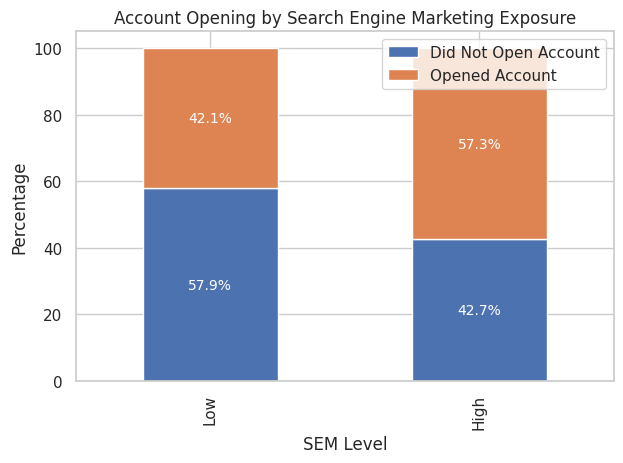

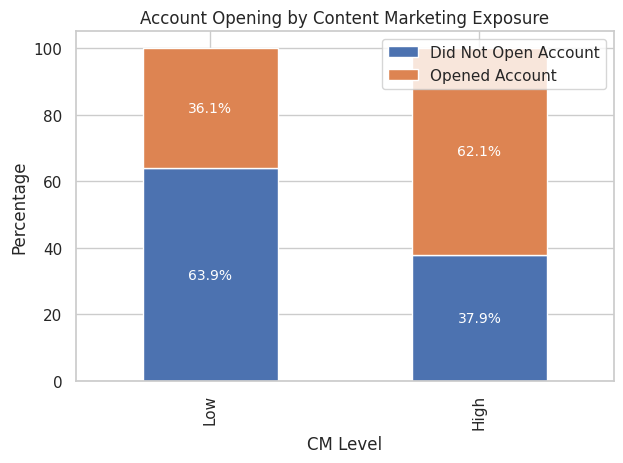

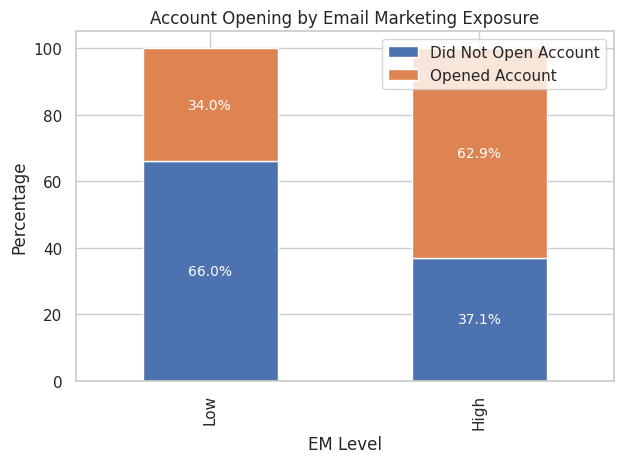

In [ ]:
# @title STEP 6 Extended Cross-tabulations based on Objectives

def add_percentage_labels(ax):
    """ Adds percentage labels to stacked bar charts. """
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white")

# 1. Cross-tab: Opened Account by Age
opened_age = pd.crosstab(df['Age'], df['Opened_Account'], normalize='index') * 100
opened_age.columns = ['Did Not Open Account', 'Opened Account']
ax = opened_age.plot(kind='bar', stacked=True)
plt.title("Customer Acquisition by Age Group")
plt.ylabel("Percentage")
plt.xlabel("Age")
plt.legend(title="Account Opening")
plt.tight_layout()
add_percentage_labels(ax)
plt.show()

# 2. Cross-tab: Opened Account by Gender
opened_gender = pd.crosstab(df['Gender'], df['Opened_Account'], normalize='index') * 100
opened_gender.columns = ['Did Not Open Account', 'Opened Account']
ax = opened_gender.plot(kind='bar', stacked=True)
plt.title("Customer Acquisition by Gender")
plt.ylabel("Percentage")
plt.xlabel("Gender")
plt.legend(title="Account Opening")
plt.tight_layout()
add_percentage_labels(ax)
plt.show()

# 3. Cross-tab: High vs Low Social Media Marketing by Account Opened
df['SMM_Level'] = pd.cut(df['Social_Media_Marketing'], bins=[0, 2.9, 5], labels=['Low', 'High'])
smm_acq = pd.crosstab(df['SMM_Level'], df['Opened_Account'], normalize='index') * 100
smm_acq.columns = ['Did Not Open Account', 'Opened Account']
ax = smm_acq.plot(kind='bar', stacked=True)
plt.title("Account Opening by Social Media Marketing Exposure")
plt.ylabel("Percentage")
plt.xlabel("SMM Level")
plt.legend(title="Account Opening")
plt.tight_layout()
add_percentage_labels(ax)
plt.show()

# Repeat for other digital marketing strategies

# Search Engine Marketing
df['SEM_Level'] = pd.cut(df['Search_Engine_Marketing'], bins=[0, 2.9, 5], labels=['Low', 'High'])
sem_acq = pd.crosstab(df['SEM_Level'], df['Opened_Account'], normalize='index') * 100
sem_acq.columns = ['Did Not Open Account', 'Opened Account']
ax = sem_acq.plot(kind='bar', stacked=True)
plt.title("Account Opening by Search Engine Marketing Exposure")
plt.ylabel("Percentage")
plt.xlabel("SEM Level")
plt.tight_layout()
add_percentage_labels(ax)
plt.show()

# Content Marketing
df['CM_Level'] = pd.cut(df['Content_Marketing'], bins=[0, 2.9, 5], labels=['Low', 'High'])
cm_acq = pd.crosstab(df['CM_Level'], df['Opened_Account'], normalize='index') * 100
cm_acq.columns = ['Did Not Open Account', 'Opened Account']
ax = cm_acq.plot(kind='bar', stacked=True)
plt.title("Account Opening by Content Marketing Exposure")
plt.ylabel("Percentage")
plt.xlabel("CM Level")
plt.tight_layout()
add_percentage_labels(ax)
plt.show()

# Email Marketing
df['EM_Level'] = pd.cut(df['Email_Marketing'], bins=[0, 2.9, 5], labels=['Low', 'High'])
em_acq = pd.crosstab(df['EM_Level'], df['Opened_Account'], normalize='index') * 100
em_acq.columns = ['Did Not Open Account', 'Opened Account']
ax = em_acq.plot(kind='bar', stacked=True)
plt.title("Account Opening by Email Marketing Exposure")
plt.ylabel("Percentage")
plt.xlabel("EM Level")
plt.tight_layout()
add_percentage_labels(ax)
plt.show()


In [ ]:

# @title STEP 7: Cronbach’s Alpha
constructs = {
    'Social Media Marketing': [f'smm{i}' for i in range(1, 6)],
    'Search Engine Marketing': [f'sem{i}' for i in range(1, 6)],
    'Content Marketing': [f'cm{i}' for i in range(1, 6)],
    'Email Marketing': [f'em{i}' for i in range(1, 6)]
}
for name, items in constructs.items():
    alpha, _ = cronbach_alpha(df[items])
    print(f"{name} - Cronbach’s alpha: {round(alpha, 3)}")


Social Media Marketing - Cronbach’s alpha: 0.995
Search Engine Marketing - Cronbach’s alpha: 0.996
Content Marketing - Cronbach’s alpha: 0.996
Email Marketing - Cronbach’s alpha: 0.997


In [ ]:
# @title STEP 8: Hierarchical Multiple Regression
# Simulate outcome variable (Opened_Account)
if 'Opened_Account' not in df.columns:
    df['Opened_Account'] = np.where(df['Email_Marketing'] + np.random.normal(0, 1, len(df)) > 3.5, 1, 0)

# Step 1 model: Only demographics
df['Gender_Code'] = df['Gender'].astype('category').cat.codes
X1 = sm.add_constant(df[['Gender_Code']])
model1 = sm.OLS(df['Opened_Account'], X1).fit()

# Step 2 model: Add digital marketing variables
X2 = sm.add_constant(df[['Gender_Code', 'Social_Media_Marketing', 'Email_Marketing', 'Search_Engine_Marketing', 'Content_Marketing']])
model2 = sm.OLS(df['Opened_Account'], X2).fit()

print("\nHierarchical Regression Step 1:")
print(model1.summary())
print("\nHierarchical Regression Step 2:")
print(model2.summary())




Hierarchical Regression Step 1:
                            OLS Regression Results                            
Dep. Variable:         Opened_Account   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.05207
Date:                Sun, 22 Jun 2025   Prob (F-statistic):              0.820
Time:                        19:17:46   Log-Likelihood:                -289.68
No. Observations:                 400   AIC:                             583.4
Df Residuals:                     398   BIC:                             591.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0


Moderation Analysis (SMM × PEOU):
                            OLS Regression Results                            
Dep. Variable:         Opened_Account   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     18.17
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           4.57e-11
Time:                        09:15:42   Log-Likelihood:                -263.92
No. Observations:                 400   AIC:                             535.8
Df Residuals:                     396   BIC:                             551.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.

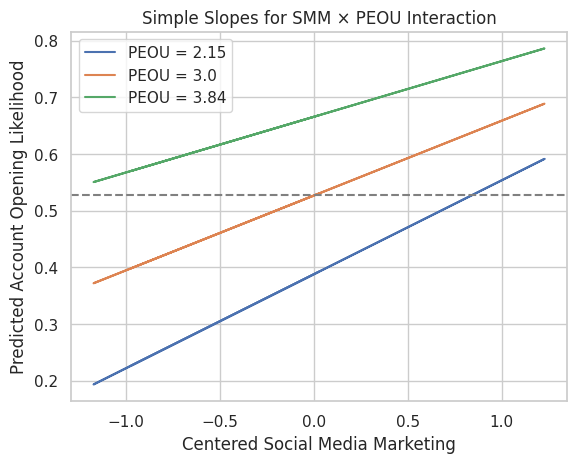

In [ ]:
# @title STEP 9: Moderation Analysis (SMM × PEOU)

# Use cm3 as proxy for Perceived Ease of Use (PEOU)
df['PEOU'] =  df['cm3']

# Mean-centering
df['SMM_c'] = df['Social_Media_Marketing'] - df['Social_Media_Marketing'].mean()
df['PEOU_c'] = df['PEOU'] - df['PEOU'].mean()

# Interaction term
df['SMMxPEOU'] = df['SMM_c'] * df['PEOU_c']

# Moderation regression
mod = sm.OLS(df['Opened_Account'], sm.add_constant(df[['SMM_c', 'PEOU_c', 'SMMxPEOU']])).fit()
print("\nModeration Analysis (SMM × PEOU):")
print(mod.summary())

# Plot simple slopes
for level in [-1, 0, 1]:
    peou_level = df['PEOU_c'].mean() + level * df['PEOU_c'].std()
    pred = mod.params['const'] + mod.params['SMM_c'] * df['SMM_c'] + mod.params['PEOU_c'] * peou_level + mod.params['SMMxPEOU'] * (df['SMM_c'] * peou_level)
    plt.plot(df['SMM_c'], pred, label=f'PEOU = {round(peou_level + df["PEOU"].mean(), 2)}')

plt.axhline(df['Opened_Account'].mean(), linestyle='--', color='gray')
plt.title("Simple Slopes for SMM × PEOU Interaction")
plt.xlabel("Centered Social Media Marketing")
plt.ylabel("Predicted Account Opening Likelihood")
plt.legend()
plt.show()


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define variables and proxies
independent_vars = {
    'SMM': 'Social_Media_Marketing',
    'SEM': 'Search_Engine_Marketing',
    'CM': 'Content_Marketing',
    'EM': 'Email_Marketing'
}

moderators = {
    'PEOU': 'cm3',  # Perceived Ease of Use
    'PU': 'sem2',   # Perceived Usefulness
    'ATT': 'em4',   # Attitudes
    'SN': 'smm5',   # Subjective Norms
    'PBC': 'cm5'    # Perceived Behavioral Control
}

results = {}

# Loop over all combinations
for iv_key, iv_col in independent_vars.items():
    for mod_key, mod_col in moderators.items():
        # Mean center
        df[f'{iv_key}_c'] = df[iv_col] - df[iv_col].mean()
        df[f'{mod_key}_c'] = df[mod_col] - df[mod_col].mean()

        # Interaction term
        interaction_term = f'{iv_key}x{mod_key}'
        df[interaction_term] = df[f'{iv_key}_c'] * df[f'{mod_key}_c']

        # Fit moderation model
        model = sm.OLS(df['Opened_Account'], sm.add_constant(df[[f'{iv_key}_c', f'{mod_key}_c', interaction_term]])).fit()
        results[f'{iv_key} × {mod_key}'] = model

        print(f'\nModeration Analysis: {iv_key} × {mod_key}')
        print(model.summary())



Moderation Analysis: SMM × PEOU
                            OLS Regression Results                            
Dep. Variable:         Opened_Account   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     18.17
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           4.57e-11
Time:                        16:53:27   Log-Likelihood:                -263.92
No. Observations:                 400   AIC:                             535.8
Df Residuals:                     396   BIC:                             551.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.52

# STEP 11: Confirmatory Factor Analysis (CFA)

In [ ]:
# This cell performs the CFA and related analyses (Cronbach's Alpha, CR, AVE, Fornell-Larcker)
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from factor_analyzer import ConfirmatoryFactorAnalyzer, ModelSpecificationParser
from tabulate import tabulate

# Load the dataset
file_path = "/content/Simulated_HighReliability_Correlated_FullDataset.xlsx"
df = pd.read_excel(file_path)

# Define constructs and their items
constructs = {
    "SMM": ['smm1', 'smm2', 'smm3', 'smm4', 'smm5'],
    "SEM": ['sem1', 'sem2', 'sem3', 'sem4', 'sem5'],
    "CM": ['cm1', 'cm2', 'cm3', 'cm4', 'cm5'],
    "EM": ['em1', 'em2', 'em3', 'em4', 'em5']
}

# Prepare data
all_items = sum(constructs.values(), [])
data = df[all_items].dropna()
data_scaled = StandardScaler().fit_transform(data)

# CFA model
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(data, constructs)
cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False)
cfa.fit(data_scaled)

# Factor Loadings
loadings = pd.DataFrame(cfa.loadings_, index=all_items, columns=constructs.keys())
print("Factor Loadings:")
print(tabulate(loadings, headers='keys', tablefmt='grid'))

# Cronbach's Alpha
def cronbach_alpha(items):
    scores = df[items].dropna()
    item_vars = scores.var(axis=0, ddof=1)
    total_var = scores.sum(axis=1).var(ddof=1)
    n = len(items)
    return (n / (n - 1)) * (1 - item_vars.sum() / total_var)

for construct, items in constructs.items():
    alpha = cronbach_alpha(items)
    print(f"{construct} Cronbach's Alpha: {alpha:.3f}")

# CR and AVE
print("\nComposite Reliability (CR) and AVE:")
for construct, items in constructs.items():
    l = loadings.loc[items, construct].values
    l_squared = l ** 2
    error = 1 - l_squared
    CR = l_squared.sum() / (l_squared.sum() + error.sum())
    AVE = l_squared.mean()
    print(f"{construct} - CR: {CR:.3f}, AVE: {AVE:.3f}")

# Fornell-Larcker Criterion
print("\nFornell-Larcker Criterion:")
construct_scores = {k: df[v].mean(axis=1) for k, v in constructs.items()}
construct_df = pd.DataFrame(construct_scores)
cor_matrix = construct_df.corr()
fornell = pd.DataFrame(index=constructs.keys(), columns=constructs.keys())
for i in constructs:
    for j in constructs:
        if i == j:
            l = loadings.loc[constructs[i], i].values
            fornell.loc[i, j] = round(np.sqrt((l ** 2).mean()), 3)
        else:
            fornell.loc[i, j] = round(cor_matrix.loc[i, j], 3)
print(tabulate(fornell, headers='keys', tablefmt='grid'))

Factor Loadings:
+------+----------+----------+----------+----------+
|      |      SMM |      SEM |       CM |       EM |
+======+==========+==========+==========+==========+
| smm1 | 0.984554 | 0        | 0        | 0        |
+------+----------+----------+----------+----------+
| smm2 | 0.986082 | 0        | 0        | 0        |
+------+----------+----------+----------+----------+
| smm3 | 0.990152 | 0        | 0        | 0        |
+------+----------+----------+----------+----------+
| smm4 | 0.986142 | 0        | 0        | 0        |
+------+----------+----------+----------+----------+
| smm5 | 0.990279 | 0        | 0        | 0        |
+------+----------+----------+----------+----------+
| sem1 | 0        | 0.986327 | 0        | 0        |
+------+----------+----------+----------+----------+
| sem2 | 0        | 0.988858 | 0        | 0        |
+------+----------+----------+----------+----------+
| sem3 | 0        | 0.985296 | 0        | 0        |
+------+----------+----------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# STEP 12: Structural Equation Modeling (SEM)

In [ ]:
# This cell performs the SEM analysis
import pandas as pd
from semopy import Model, calc_stats

# Load the dataset
file_path = "/content/Simulated_HighReliability_Correlated_FullDataset.xlsx"
df = pd.read_excel(file_path)

# Define constructs and their items
constructs = {
    "SMM": ['smm1', 'smm2', 'smm3', 'smm4', 'smm5'],
    "SEM": ['sem1', 'sem2', 'sem3', 'sem4', 'sem5'],
    "CM": ['cm1', 'cm2', 'cm3', 'cm4', 'cm5'],
    "EM": ['em1', 'em2', 'em3', 'em4', 'em5']
}

# Create construct scores
for construct, items in constructs.items():
    df[construct] = df[items].mean(axis=1)

# Prepare SEM data
sem_data = df[['SMM', 'SEM', 'CM', 'EM', 'Opened_Account']].dropna()

# Define SEM model
model_desc = """
Opened_Account ~ SMM + SEM + CM + EM
"""

# Fit the SEM model
model = Model(model_desc)
model.fit(sem_data)

# Path coefficients
estimates = model.inspect()
print("Path Coefficients:")
print(estimates[['lval', 'op', 'rval', 'Estimate']])

# Model fit indices
fit = calc_stats(model)

print("\nModel Fit Indices:")
# Access R-squared from the estimates table for the dependent variable
r_squared = estimates[estimates['lval'] == 'Opened_Account'].set_index('op').loc['~~', 'Estimate']
print(f"R² (Opened_Account): {1 - r_squared:.3f}")
print(f"RMSEA: {fit['RMSEA']['Value']:.3f}")
print(f"CFI: {fit['CFI']['Value']:.3f}")
print(f"TLI: {fit['TLI']['Value']:.3f}")

Path Coefficients:
             lval  op            rval  Estimate
0  Opened_Account   ~             SMM  0.122237
1  Opened_Account   ~             SEM  0.099838
2  Opened_Account   ~              CM  0.162394
3  Opened_Account   ~              EM  0.173078
4  Opened_Account  ~~  Opened_Account  0.192206

Model Fit Indices:
R² (Opened_Account): 0.808
RMSEA: 0.000
CFI: 1.107
TLI: 1.149


# STEP 10: Descriptive Statistics of Constructs

In [ ]:
import pandas as pd
from tabulate import tabulate

# Step 1: Load the dataset
file_path = "/content/Simulated_HighReliability_Correlated_FullDataset.xlsx"  # Make sure this path is correct in your Colab
df = pd.read_excel(file_path)

# Step 2: Define constructs and their items
constructs = {
    "SMM": ['smm1', 'smm2', 'smm3', 'smm4', 'smm5'],
    "SEM": ['sem1', 'sem2', 'sem3', 'sem4', 'sem5'],
    "CM": ['cm1', 'cm2', 'cm3', 'cm4', 'cm5'],
    "EM": ['em1', 'em2', 'em3', 'em4', 'em5']
}

# Step 3: Create new columns for each construct by averaging item scores
for construct, items in constructs.items():
    df[construct] = df[items].mean(axis=1)

# Step 4: Descriptive statistics for each construct
desc_stats = df[['SMM', 'SEM', 'CM', 'EM']].agg(['mean', 'std']).T
desc_stats.columns = ['Mean', 'Standard Deviation']
desc_stats.reset_index(inplace=True)
desc_stats.rename(columns={'index': 'Construct'}, inplace=True)

# Step 5: Display the table
print(tabulate(desc_stats, headers='keys', tablefmt='grid', showindex=False))

+-------------+--------+----------------------+
| Construct   |   Mean |   Standard Deviation |
+=============+========+======================+
| SMM         | 2.9715 |             0.793891 |
+-------------+--------+----------------------+
| SEM         | 3.0655 |             0.813304 |
+-------------+--------+----------------------+
| CM          | 3.0035 |             0.837162 |
+-------------+--------+----------------------+
| EM          | 2.96   |             0.816128 |
+-------------+--------+----------------------+
